In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e3/sample_submission.csv
/kaggle/input/playground-series-s5e3/train.csv
/kaggle/input/playground-series-s5e3/test.csv


In [19]:
import pandas as pd
train=pd.read_csv('/kaggle/input/playground-series-s5e3/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-s5e3/test.csv')

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.5 KB


In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             730 non-null    int64  
 1   day            730 non-null    int64  
 2   pressure       730 non-null    float64
 3   maxtemp        730 non-null    float64
 4   temparature    730 non-null    float64
 5   mintemp        730 non-null    float64
 6   dewpoint       730 non-null    float64
 7   humidity       730 non-null    float64
 8   cloud          730 non-null    float64
 9   sunshine       730 non-null    float64
 10  winddirection  729 non-null    float64
 11  windspeed      730 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 68.6 KB


In [22]:
train.head(5)

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [23]:
train.shape

(2190, 13)

In [24]:
train.isnull().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

In [25]:
train.describe()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1094.500000,179.948402,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,632.342866,105.203592,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,0.000000,1.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,547.250000,89.000000,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,1094.500000,178.500000,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,1641.750000,270.000000,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,2189.000000,365.000000,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


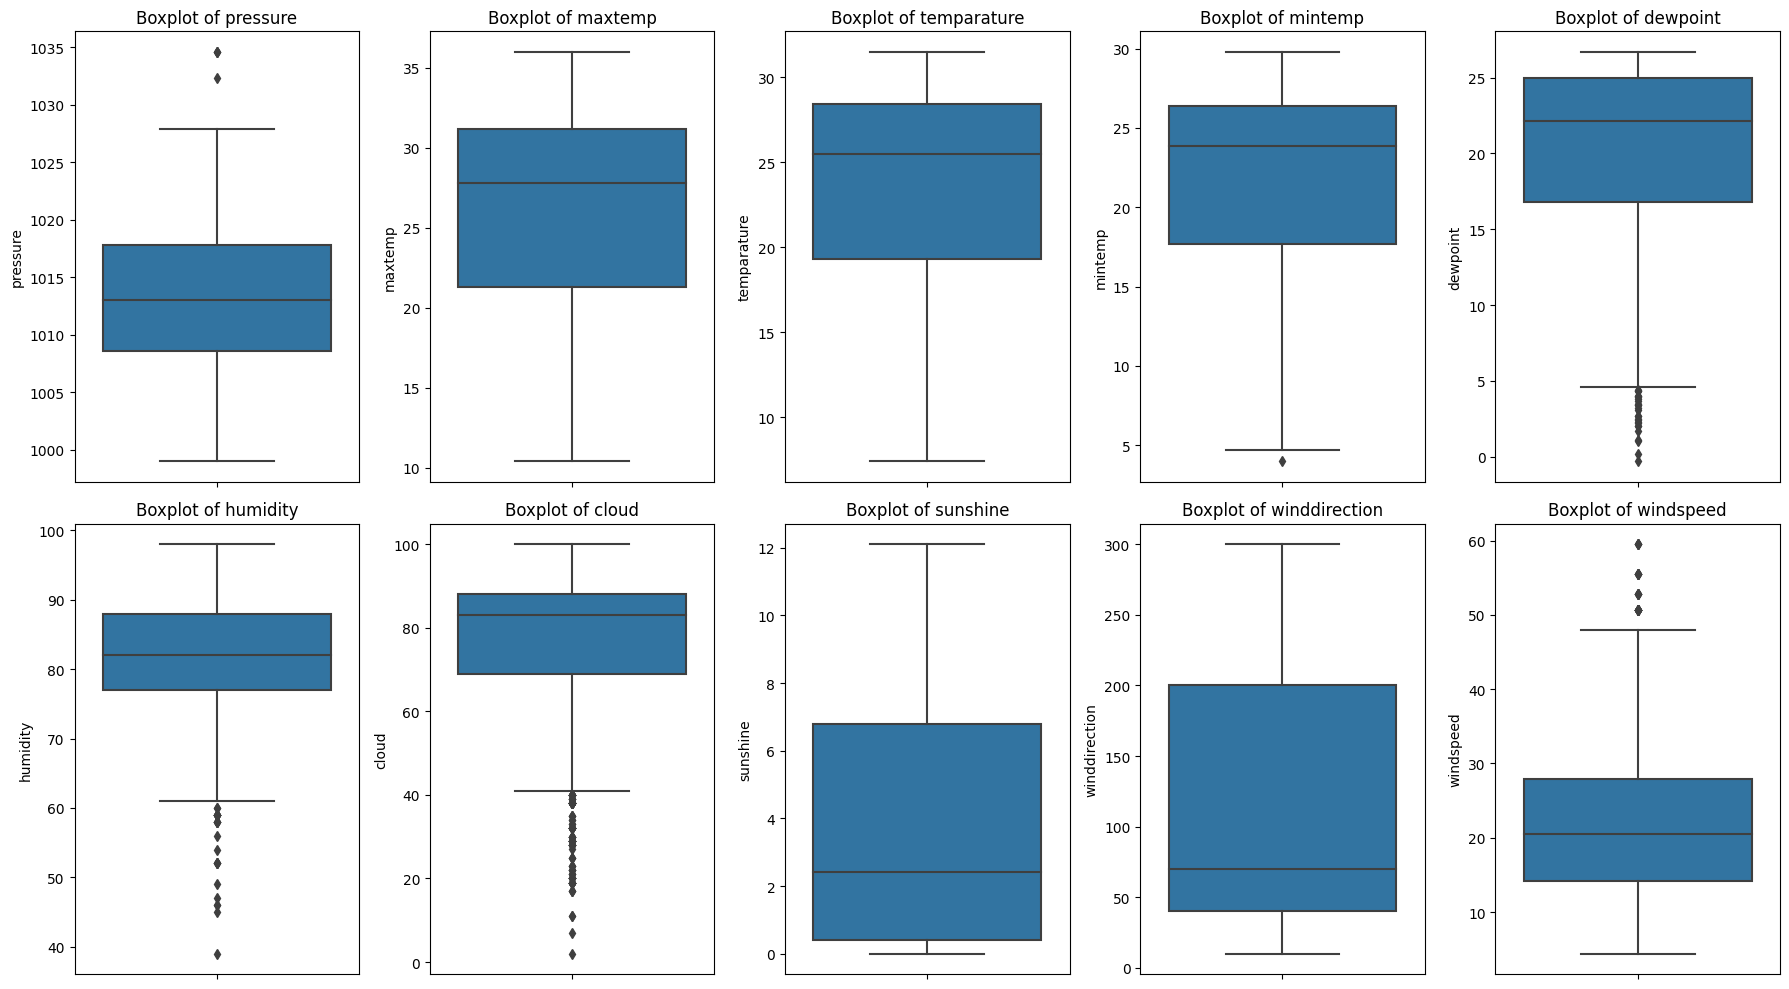

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns (excluding id and day)
numerical_cols = ['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
                  'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']

# Create subplots for boxplots
fig, axes = plt.subplots(2, 5, figsize=(18, 10))  # 2 rows, 5 columns

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot boxplots for each numerical column
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=train[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

plt.tight_layout()  # Adjust layout
plt.show()


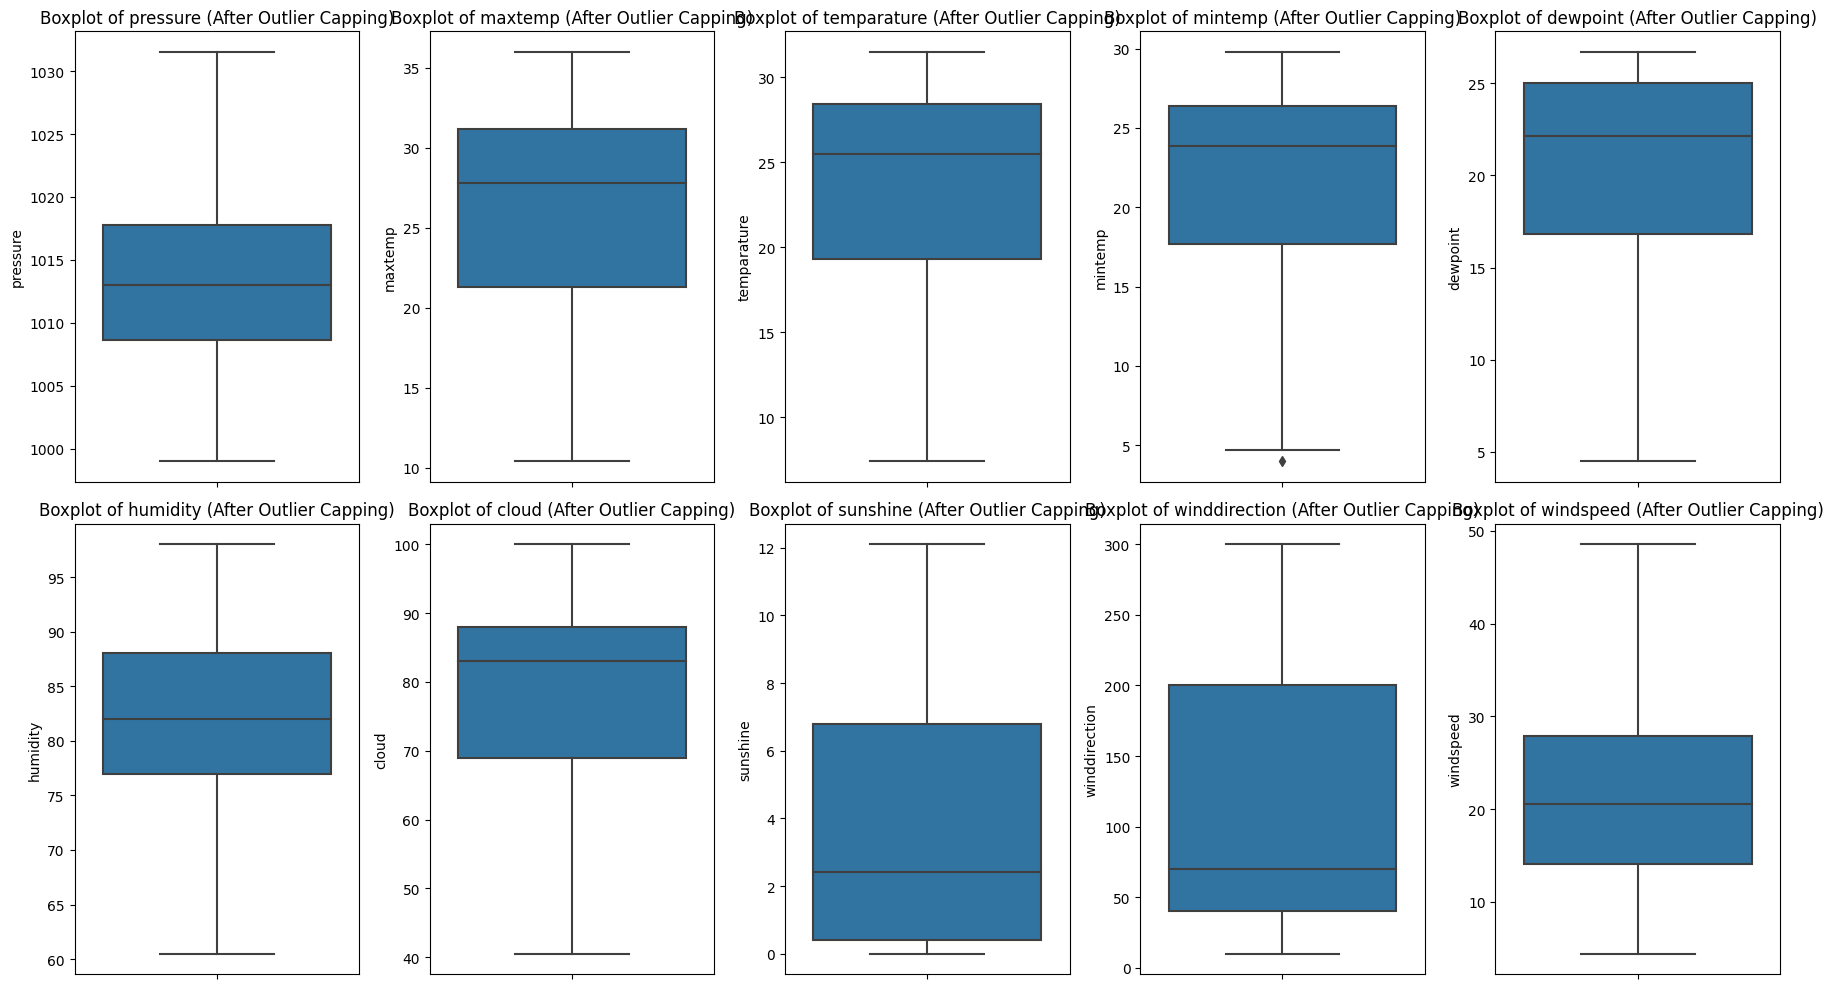

In [27]:
import numpy as np

# Function to cap outliers using IQR method
def cap_outliers(df, col):
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    train[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    train[col] = np.where(df[col] < lower_bound, lower_bound, df[col])

# Columns to apply outlier capping
outlier_cols = ['pressure', 'dewpoint', 'humidity', 'cloud', 'windspeed']

# Apply capping
for col in outlier_cols:
    cap_outliers(train, col)

# Replot boxplots to confirm outlier treatment
fig, axes = plt.subplots(2, 5, figsize=(18, 10))  # 2 rows, 5 columns
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=train[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col} (After Outlier Capping)")

plt.tight_layout()
plt.show()


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Bayesian Classifier": GaussianNB(),
    "SVM classifier": SVC(probability=True, kernel='rbf', random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=1000, random_state=42)
}



In [29]:
from sklearn.model_selection import StratifiedKFold

# Define features (X) and target variable (y)
X = train.drop(columns=['rainfall'])  # Remove target column
y = train['rainfall']  # Target variable

# Apply cross-validation split (Stratified K-Fold)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store trained models from cross-validation
cv_trained_models = {}

# Perform cross-validation training
for name, model in models.items():
    fold_models = []  # Store models for each fold
    for train_idx, val_idx in kfold.split(X, y):
        X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
        y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]
        
        # Train model on the current fold
        model.fit(X_train_fold, y_train_fold)
        fold_models.append(model)
        
    
    # Store trained models for all folds
    cv_trained_models[name] = fold_models

# Confirm that models are trained across folds
cv_trained_models.keys()


dict_keys(['Logistic Regression', 'Random Forest', 'Bayesian Classifier', 'SVM classifier', 'Neural Network'])

In [36]:
from sklearn.metrics import roc_auc_score
import numpy as np

# Store cross-validation ROC-AUC scores for each model
cv_roc_auc_scores = {}

# Evaluate models using ROC-AUC scores across folds
for name, fold_models in cv_trained_models.items():
    fold_roc_auc = []

    for i, (train_idx, val_idx) in enumerate(kfold.split(X, y)):
        X_val_fold = X.iloc[val_idx]
        y_val_fold = y.iloc[val_idx]

        # Get the trained model for this fold
        model = fold_models[i]

        # Predict probabilities for the positive class (Rainfall = 1)
        if hasattr(model, "predict_proba"):  # Check if model supports probability predictions
            y_prob = model.predict_proba(X_val_fold)[:, 1]
            # Compute ROC-AUC score
            roc_auc = roc_auc_score(y_val_fold, y_prob)
            fold_roc_auc.append(roc_auc)
    
    # Store the average ROC-AUC score for this model across folds
    cv_roc_auc_scores[name] = np.mean(fold_roc_auc)

# Display the cross-validation ROC-AUC scores
cv_roc_auc_scores


{'Logistic Regression': 0.8963804713804715,
 'Random Forest': 0.979601571268238,
 'Bayesian Classifier': 0.8852861952861952,
 'SVM classifier': 0.8884203142536476,
 'Neural Network': 0.8763243546576881}

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.5 KB


In [31]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             730 non-null    int64  
 1   day            730 non-null    int64  
 2   pressure       730 non-null    float64
 3   maxtemp        730 non-null    float64
 4   temparature    730 non-null    float64
 5   mintemp        730 non-null    float64
 6   dewpoint       730 non-null    float64
 7   humidity       730 non-null    float64
 8   cloud          730 non-null    float64
 9   sunshine       730 non-null    float64
 10  winddirection  729 non-null    float64
 11  windspeed      730 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 68.6 KB


In [32]:
test.head(5)

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4


In [42]:

X_new_test = test
log_reg_preds = models.get('Logistic Regression').predict(X_new_test)  # Last trained model from CV


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(test['columns'])

# Apply the same scaling transformation to the test data
X_new_test_scaled = scaler.transform(X_new_test)
X_new_test_scaled = scaler.transform(test)

# Get predictions from trained models
log_reg_preds = models["Logistic Regression"].predict(X_new_test_scaled)
rf_preds = models["Random Forest"].predict(X_new_test_scaled)
svm_preds = models["SVM classifier"].predict(X_new_test_scaled)


NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.